In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))

In [3]:
import sys
sys.path.append(wd+"\\PB11\\")

In [7]:
import numpy as np
from scipy import interpolate
from math import pi, ceil
import sys
import time
import random as rnd
from Invariants.Tube import Tube

from Invariants.Plot import *
from Pneumatics.PnInit import pn_create_layer

In [14]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [92]:
tube_xs = [0, 0.5, 1, 2.5]
k=0.5
tube_ds = [0.023,0.023, 0.023*k, 0.023*k]
tube = Tube(tube_xs, tube_ds)

In [132]:
solver_grid = {
    'type':'gas',
    'n_cells': 1000,
    'xl': 0,
    'xr': 2,
    'vl': 0,
    'vr': 150,
    'consts': {
        'covolume': 0,#0.0010838,
        'R': 287,
        'gamma': 1.4
    },
    'init_const':{
        'p': 400e5,
        'T': 300
    }
}



In [133]:
lr = pn_create_layer(solver_grid, tube)
lrs = []
for i in range(500):
    tau = lr.time_step()*0.3
    lr = lr.euler_step_new(tau, 0, 0, lr.x[-1]+tau*solver_grid['vr'], solver_grid['vr'])
    lr.ro, lr.u, lr.e = lr.get_param(lr.q)
    lrs.append(lr)

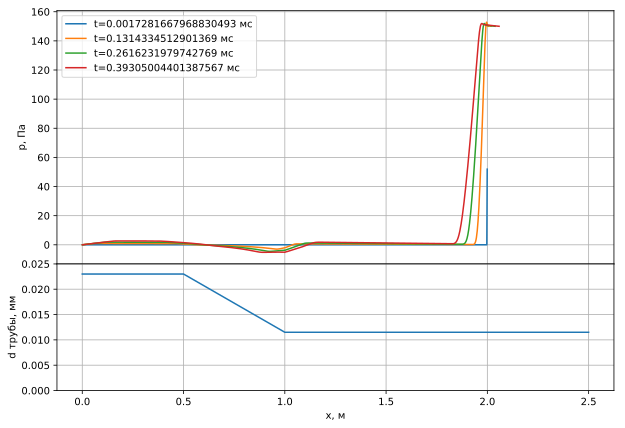

In [134]:
def ploty(i, ax):
    lr = lrs[i]
    ax.plot(lr.x_c, lr.u, label=f't={lr.time*1000} мс')
    
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10,7), gridspec_kw={'height_ratios':[2, 1]})
for i in [0, 100, 200, 300]:
    ploty(i, ax0)
ax0.grid(True)
ax0.legend()
ax1.plot(tube_xs, tube_ds)
ax1.grid(True)
ax1.set_ylabel('d трубы, мм')
ax1.set_xlabel('x, м')
ax0.set_ylabel('p, Па')
ax1.set_ylim(0,0.025)
plt.subplots_adjust(hspace=.0)
plt.show()

In [135]:
@interact(ind=ipywidgets.IntSlider(min=0,max=len(lrs)-1,step=5, value=0))
def plot_2(ind):
    lr = lrs[ind]
    plt.plot(lr.x_c, lr.u, label=f't={lr.time*1000} мс')
    plt.ylim(-1,1)
    plt.grid(True)
    plt.show()
    

interactive(children=(IntSlider(value=0, description='ind', max=499, step=5), Output()), _dom_classes=('widget…

### Файл от Никиты

In [136]:
lines = []
with open(r'C:\Users\Михаил\Downloads\t_x_p') as f:
    lines = [[float(el) for el in l.split()] for l in f]
lines[:4]


[[4.8005e-06, 0.0, 40000000.0],
 [4.8005e-06, 0.0166726671, 40000000.0],
 [4.8005e-06, 0.0333453342, 40000000.0],
 [4.8005e-06, 0.0500180013, 40000000.0]]

In [137]:
from functional import seq

In [138]:
batches = seq(lines).group_by(lambda l: l[0]).to_list()

len(batches[0][1]), batches[0:1]


(120,
 [(4.8005e-06,
   [[4.8005e-06, 0.0, 40000000.0],
    [4.8005e-06, 0.0166726671, 40000000.0],
    [4.8005e-06, 0.0333453342, 40000000.0],
    [4.8005e-06, 0.0500180013, 40000000.0],
    [4.8005e-06, 0.0666906685, 40000000.0],
    [4.8005e-06, 0.0833633393, 40000000.0],
    [4.8005e-06, 0.1000360101, 40000000.0],
    [4.8005e-06, 0.116708681, 40000000.0],
    [4.8005e-06, 0.1333813518, 40000000.0],
    [4.8005e-06, 0.1500540227, 40000000.0],
    [4.8005e-06, 0.1667266935, 40000000.0],
    [4.8005e-06, 0.1833993644, 40000000.0],
    [4.8005e-06, 0.2000720352, 40000000.0],
    [4.8005e-06, 0.216744706, 40000000.0],
    [4.8005e-06, 0.2334173769, 40000000.0],
    [4.8005e-06, 0.2500900328, 40000000.0],
    [4.8005e-06, 0.2667627037, 40000000.0],
    [4.8005e-06, 0.2834353745, 40000000.0],
    [4.8005e-06, 0.3001080453, 40000000.0],
    [4.8005e-06, 0.3167807162, 40000000.0],
    [4.8005e-06, 0.333453387, 40000000.0],
    [4.8005e-06, 0.3501260579, 40000000.0],
    [4.8005e-06, 0.3667

In [143]:

@interact(ind=ipywidgets.IntSlider(min=0,max=len(batches)-1,step=5, value=0))
def plotMe(ind):
    t, data = batches[ind]
    xs = [lst[1] for lst in data]
    ys = [lst[2] for lst in data]
    plt.plot(xs, ys)
#     plt.ylim(-1, 1)
    plt.title(ys[-1])
    plt.grid(True)
    plt.show()
    

interactive(children=(IntSlider(value=0, description='ind', max=1334, step=5), Output()), _dom_classes=('widge…

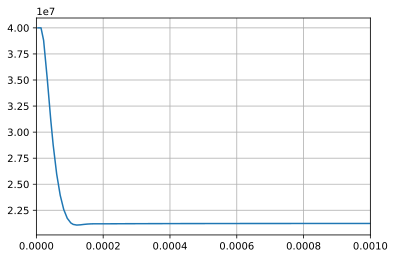

In [152]:
ts = [b[0] for b in batches]
ps = seq(batches).map(lambda b: b[1]).map(lambda lst: lst[-1][2]).to_list()
plt.plot(ts, ps)
plt.xlim(0,0.001)
plt.grid()
plt.show()
